In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [43]:
df = pd.read_csv('Salary_dataset.csv')

In [44]:
df.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [45]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(5)


,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [46]:
df.shape

(30, 2)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [59]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Salary']),
                                                    df['Salary'],
                                                    test_size=0.25,
                                                    random_state=111)

In [60]:
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [61]:
reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [62]:
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.8894295727034145

In [69]:
plot_data = pd.DataFrame({
    'YearsExperience': X_test['YearsExperience'],
    'ActualSalary': y_test,
    'PredictedSalary': y_pred
})

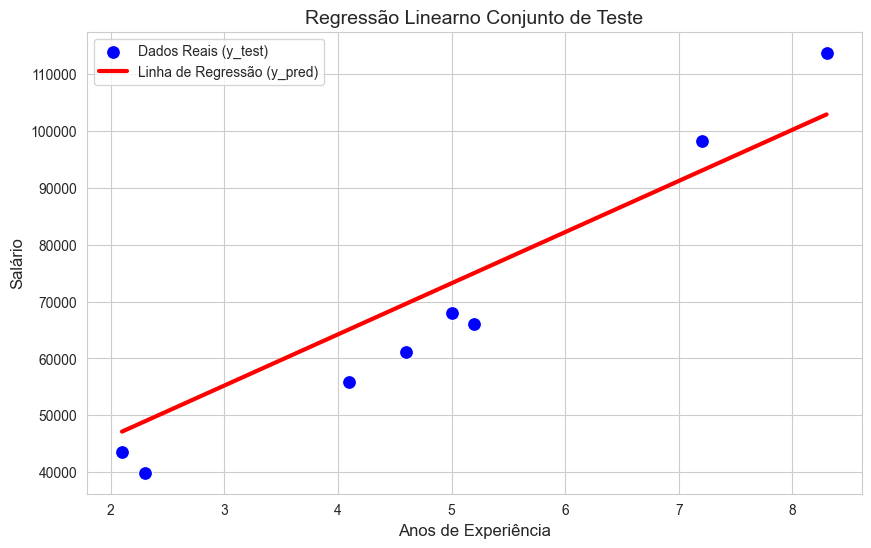

In [72]:
plot_data_sorted = plot_data.sort_values(by='YearsExperience')
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x='YearsExperience', y='ActualSalary', data=plot_data, 
                label='Dados Reais (y_test)', color='blue', s=100)

sns.lineplot(x='YearsExperience', y='PredictedSalary', data=plot_data_sorted, 
             label='Linha de Regressão (y_pred)', color='red', linewidth=3)

plt.title('Regressão Linearno Conjunto de Teste', fontsize=14)
plt.xlabel('Anos de Experiência', fontsize=12)
plt.ylabel('Salário', fontsize=12)
plt.legend()
plt.savefig('regressao_linear_plot.png')